# Gradient Boosting Regression

1. Convert Business Problem to Data Science Problem
2. Load Data
3. Understand the Data
4. Data Preprocessing
5. Exploratory Data Analysis
6. Model Building
7. Predictions and Evaluations
8. Hyperparameter Tuning

## 1. Import Libraries

In [22]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV 

import warnings
warnings.filterwarnings('ignore')

## 2. Load Data

In [23]:
df = pd.read_csv("C:/Users/trela/Desktop/Data Projects/Datasets/OptimalVehiclePricing.csv")

## 3. Understanding the data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [25]:
df.head()  

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [27]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')
Categorical columns: 
 Index(['make', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')


## 4. Data Pre-processing

In [28]:
df.drop(['make'],axis=1,inplace=True)

cat = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

df = pd.get_dummies(df,cat,drop_first=True)

## 5. Exploratory Data Analysis

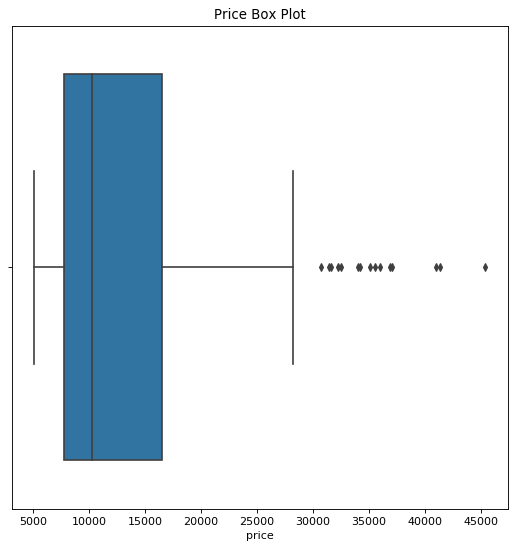

In [29]:
# Let's check the distribution of y variable
plt.figure(figsize=(8,8), dpi= 80)
sns.boxplot(df['price'])
plt.title('Price Box Plot')
plt.show()

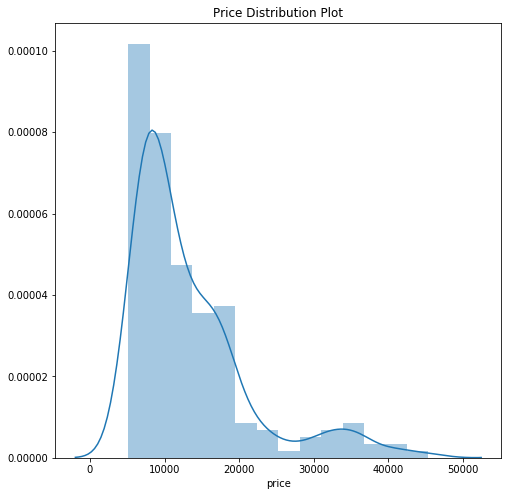

In [30]:
plt.figure(figsize=(8,8))
plt.title('Price Distribution Plot')
sns.distplot(df['price'])

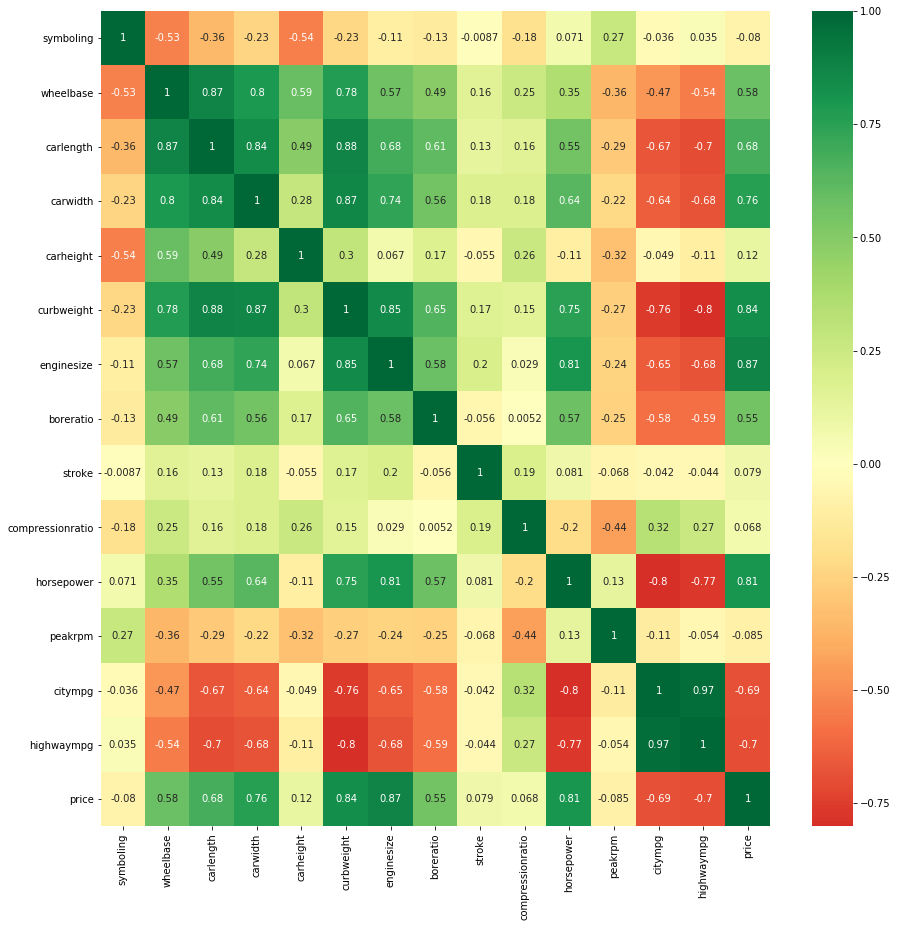

In [31]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(15,15))
p=sns.heatmap(df[num_col].corr(), annot=True,cmap='RdYlGn',center=0) 

## 6. Model Building

In [32]:
# Train test split
X = df.drop(['price'], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=500)

In [33]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Gradient Boosting Regression

- learning_rate = 0.05

In [34]:
gbr = GradientBoostingRegressor(learning_rate = 0.05, random_state = 100)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAPE     : ",mean_absolute_percentage_error(y_test,y_pred))

r2 score :  0.9004401736606921
MAPE     :  11.26429492783448


**Summary :**

MAPE is quite higher, so let's try to tune the parameter again

## Gradient Boosting Regression

- learning_rate = 0.1

In [35]:
gbr = GradientBoostingRegressor(learning_rate = 0.1, random_state = 100)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAPE     : ",mean_absolute_percentage_error(y_test,y_pred))

r2 score :  0.9053242536929086
MAPE     :  10.656175859663653


**Summary :**

MAPE has improved as compared to the earlier model, let's try to tune the parameter using gridsearch

## Grid Search


In [36]:
gbr = GradientBoostingRegressor(random_state = 100)

# defining parameter range 
param_grid={'n_estimators':[100,500,1000], 
            'learning_rate': [0.2,0.15, 0.1],
            'max_depth':[2,3,4,6], 
            'min_samples_leaf':[1,3,5]}   
  
grid = GridSearchCV(gbr, param_grid, refit = True, verbose = 3, n_jobs = -1) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   39.5s finished


GridSearchCV(estimator=GradientBoostingRegressor(random_state=100), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.15, 0.1],
                         'max_depth': [2, 3, 4, 6],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 500, 1000]},
             verbose=3)

In [37]:
# Best parameter after hyper parameter tuning 
  
# Model Parameters 
print(grid.best_estimator_)
print(grid.best_params_) 

GradientBoostingRegressor(learning_rate=0.15, min_samples_leaf=3,
                          random_state=100)
{'learning_rate': 0.15, 'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 100}


In [38]:
# Prediction using best parameters
grid_predictions = grid.predict(X_test) 
  
print("r2 score : ",r2_score(y_test,grid_predictions))
print("MAPE     : ",mean_absolute_percentage_error(y_test,grid_predictions))

r2 score :  0.9042822591540534
MAPE     :  10.444374115383104
